# Sequence of steps to solve any classification Problem.
#(Assumptions: Preprocessed .csv dataset)

1) Define Problem Statement
2) Prepare Data Dictionary 
3) Hypothesis d ion
4) Exploratory Data Analysis (EDA)
5) Model Development and Evaluation
6) Conclusion

# Step1: Define Problem Statment

Dream Housing Finance company is the company that gives home loans to the customers, it will approve or reject the loans based upon some conditions, like credit_history, Applicant_Income and other features

Our problem statement here is to automate loan approval process by predicting loan can be APPROVED or NOT APPROVED

TARGET VARIABLE (DEPENDENT VARIABLE):

Loan_status: YES -- APPROVED
             NO -- NOT APPROVED


# Step2: Prepare Data Dictionary

Exploring the dataset by list down the columns and description of the columns, i.e., make a data dictionary from the dataset.

Prepare buckets based upon the types of variables:

NUMERICAL-CONTINUOUS
NUMERICAL- DISCRETE
CATEGORICAL-NOMINAL
CATEGORICAL-ORDINAL

NUMERICAL- DISCRETE
----------------------------------------
Loan_ID
Loan_Amount_Term
Credit_History


CATEGORICAL-NOMINAL
---------------------------------------
Gender
Married
Education
Self_Employed
Loan_Status (Target Variable or Dependent Variable)


CATEGORICAL-ORDINAL
--------------------------------------
Dependent
Property_Area


NUMERICAL - CONTINUOUS
------------------------------------------
ApplicantIncome
CoapplicantIncome
LoanAmount

# Step3: Hypothesis Generation

It is a process to identify the features (Variables) which have the impact on the outcome (Target Variable) from the dataset.
Ex: Applicant_Income, Loan_Term,Credit_History these features may have huge impact on the loan approval.

# Step4: Exploratory Data Analysis (EDA)

To Explore the entire dataset we need to follow a standard approach to gain more insights from the data.
These analysis can be done through various DATA Visualization techniques:
4.1 UNIVARIATE ANALYSIS
4.2 BI-VARIATE ANALYSIS 
4.3 Treating Missing Values and Outliers
4.4 Feature Engineering (Variable Transformation or Variable Creation)

For EDA, we will be using python NUMPY PANDAS and few more libraries, need to import the libraries and play around with the data to draw some insights.

In [4]:
# IMPORTING ALL NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# LOADING TRAINING & TEST DATA FROM CSV FILES
train=pd.read_csv("C:\\Users\\santhosh_aluvala\\PycharmProjects\\First_Learning_Proj\\loan-approval-prediction\\train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv("C:\\Users\\santhosh_aluvala\\PycharmProjects\\First_Learning_Proj\\loan-approval-prediction\\test_Y3wMUE5_7gLdaTN.csv")

In [3]:
#SAVING ORGINAL COPY FOR FUTURE USE
train_original=train.copy()
test_original=test.copy()

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

4.1 UNIVARIATE ANALYSIS
--------------------------------------

Identify the feature types and analyze each feature by using data visualization techniques.

For Categorical Varibles we use BAR PLOTS (or) PIE CHARTS

For Numerical Variables we use HISTO GRAMS (or) Box plots (or) DistPlots

In [22]:
#Identify the data types
train.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [21]:
# Identify Categorical Varibles
train.select_dtypes(include=['object']).columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
# Identify Numerical Varibles
train.select_dtypes(include=['int64','float']).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

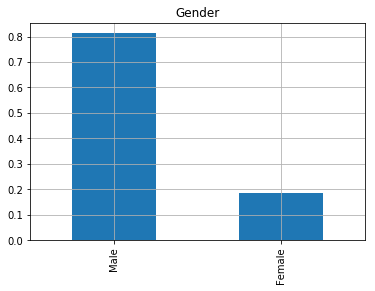

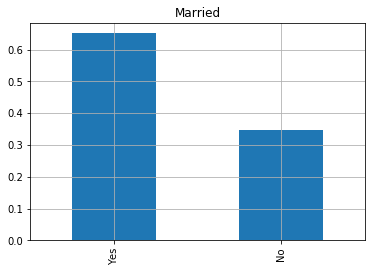

In [45]:
# Bar plots for categorical Variables.
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender',grid=True)
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married',grid=True)

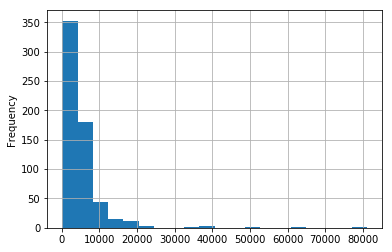

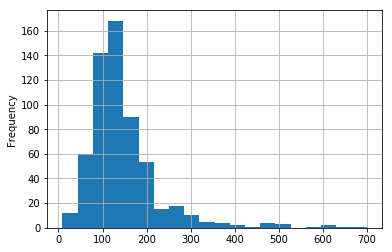

In [37]:
# Plot Histograms for Numeircal Variables
train['ApplicantIncome'].plot.hist(bins=20,grid=True)
plt.show()
train['LoanAmount'].plot.hist(bins=20,grid=True)

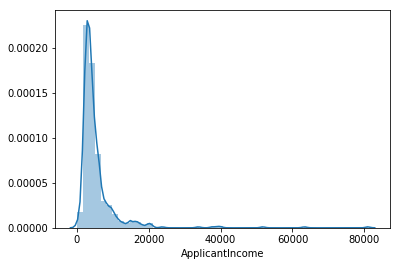

In [44]:
sns.distplot(train['ApplicantIncome'])

# 4.2 BI-VARIATE ANALYSIS
---------------------------------------------

Analyze each feature against target variable to get some insights.

In [40]:
# function used to plot bar charts using data frame against target variable (Loan_Status)
def bar_chart(feature):
    ln_approved = train[train['Loan_Status']=='Y'][feature].value_counts()
    ln_not_approved = train[train['Loan_Status']=='N'][feature].value_counts()
    df = pd.DataFrame([ln_approved,ln_not_approved])
    df.index = ['ln_approved','ln_not_approved']
    df.plot(kind='bar',stacked=True, figsize=(10,5),grid=True)

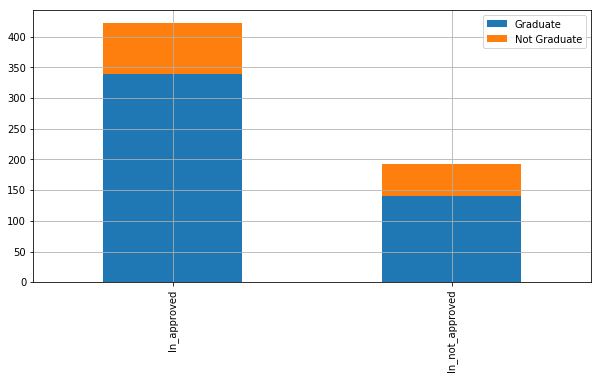

In [46]:
bar_chart('Education')

# 4.3 Treating Missing Values and Outliers

In [48]:
# Check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
# Gender can be filled with male as most of the population in the dataset are male
train['Gender'].fillna('Male',inplace=True)
test['Gender'].fillna('Male',inplace=True)

test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [86]:
#Most of the dependents are 0, we are filling missing values to 0
train['Dependents'].fillna(0,inplace=True)
test['Dependents'].fillna(0,inplace=True)
test.isnull().sum()
#train['Dependents'].value_counts()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [85]:
# Filling missing values of Self_Employed to 'NO'
train['Self_Employed'].value_counts()
train['Self_Employed'].fillna('No',inplace=True)
test['Self_Employed'].fillna('No',inplace=True)

In [68]:
# Filling missing values of Married to 'YES'
train['Married'].value_counts()
train['Married'].fillna('Yes',inplace=True)

In [87]:
# Filling missing values for LoanAmount with the mode value of the loan Amount feature
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)

In [88]:
# Filling missing values for LoanAmount term with the mode value of the loan Amount term feature
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [89]:
# Filling missing values for Credit_History with the mode value of the Credit_History feature
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [90]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [1]:
# Treating missing values can be done by creating a function.kind of automating the removal of missing values in any dataset.
# below is the function to any file
def read_file(fname):
    return pd.read_csv("C:\\Users\\santhosh_aluvala\\PycharmProjects\\First_Learning_Proj\\loan-approval-prediction\\"+fname+".csv")

In [2]:
# This is the function to drop features by dynamically passing missing ratio.
missing_val_list=[]
def missing_values(p_dataset,missing_ratio):
    for i in range(len(p_dataset.columns)):
        if(p_dataset[p_dataset.columns[i]].isnull().sum()/len(p_dataset)>missing_ratio):
            missing_val_list.append(p_dataset.columns[i])
    return p_dataset.drop(missing_val_list,inplace=True,axis=1)

In [5]:
train2=read_file('train_u6lujuX_CVtuZ9i')
test3=read_file('test_Y3wMUE5_7gLdaTN')

In [7]:
train2.shape

(614, 13)

In [8]:
# Calling missing_values function by specifying the missing_ratio.
missing_values(test3,0.02)

In [9]:
missing_values(train2,0.02)

In [10]:
# train2.shape after dropping the features with missing values.
train2.shape

(614, 7)

In [30]:
# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

In [16]:
df=train.dropna()